# Abstract

El conjunto de datos "Global Traffic Accidents Dataset" proporciona un registro detallado de 10,000 accidentes de tráfico ocurridos en diversas ubicaciones alrededor del mundo. Este dataset incluye información clave como la fecha, hora, ubicación geográfica, condiciones climáticas y del camino, cantidad de vehículos involucrados, número de víctimas y la causa del accidente. Su análisis permite identificar patrones y tendencias en los accidentes viales, proporcionando una base fundamental para mejorar la seguridad en las carreteras a nivel global.

El estudio de este dataset permite explorar la relación entre factores ambientales y humanos con la incidencia y gravedad de los accidentes de tráfico. Factores como las condiciones meteorológicas y del camino pueden influir significativamente en la frecuencia y severidad de los accidentes. Asimismo, causas humanas como la conducción imprudente o bajo los efectos del alcohol juegan un papel crucial en la seguridad vial. Comprender estas interacciones puede ayudar a diseñar estrategias de mitigación más efectivas y generar políticas públicas orientadas a reducir la siniestralidad.




# Preguntas sobre el dataset

¿Cuáles son las principales causas de accidentes de tráfico a nivel global?

¿Cómo influyen las condiciones climáticas en la frecuencia y gravedad de los accidentes?

¿Existe una correlación entre el número de vehículos involucrados y la cantidad de víctimas?

¿Cuáles son los horarios en los que se reportan más accidentes?

Hipótesis de interés

Los accidentes de tráfico son más frecuentes en condiciones climáticas adversas, como lluvia o nieve.

La conducción imprudente y el manejo bajo los efectos del alcohol son las causas principales de los accidentes más graves.

Las ciudades con mayor densidad de población y tráfico tienen una incidencia más alta de accidentes.

Los accidentes con mayor número de vehículos involucrados tienden a generar un mayor número de víctimas.

Los accidentes ocurren con mayor frecuencia durante las horas pico del tráfico urbano.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
url = "https://raw.githubusercontent.com/Degoyeneches93/traffic_accidents/refs/heads/main/global_traffic_accidents.csv"
df_accidentes = pd.read_csv(url, sep=";")
df_accidentes.describe()

,Vehicles Involved,Casualties
count,10000.000000,10000.00000
mean,2.999100,4.98820
std,1.408935,3.13015
min,1.000000,0.00000
25%,2.000000,2.00000
50%,3.000000,5.00000
75%,4.000000,8.00000
max,5.000000,10.00000


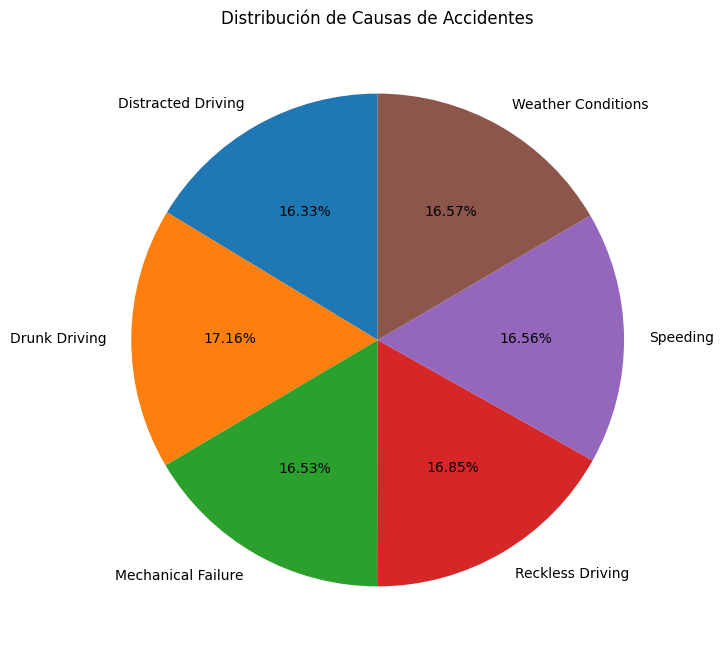

In [ ]:
df_agrupado_causa = df_accidentes.groupby('Cause').size().reset_index(name='Cantidad')
#print(df_agrupado)
plt.figure(figsize=(8,8))
plt.pie(df_agrupado_causa['Cantidad'], labels= df_agrupado_causa['Cause'], autopct='%1.2f%%', startangle=90)
plt.title('Distribución de Causas de Accidentes')
plt.show()

# Principales causas de accidentalidad
Como se evidencia, hay una distribucion muy igualada entre las causas de accidentes presentes en el dataset, no hay una predominancia de ninguna, por lo que podriamos decir que si bien, conducir bajo los efectos del alcohol y la conducción imprudente pueden ser unos de los principales motivos de la accidentalidad, no son los principales.


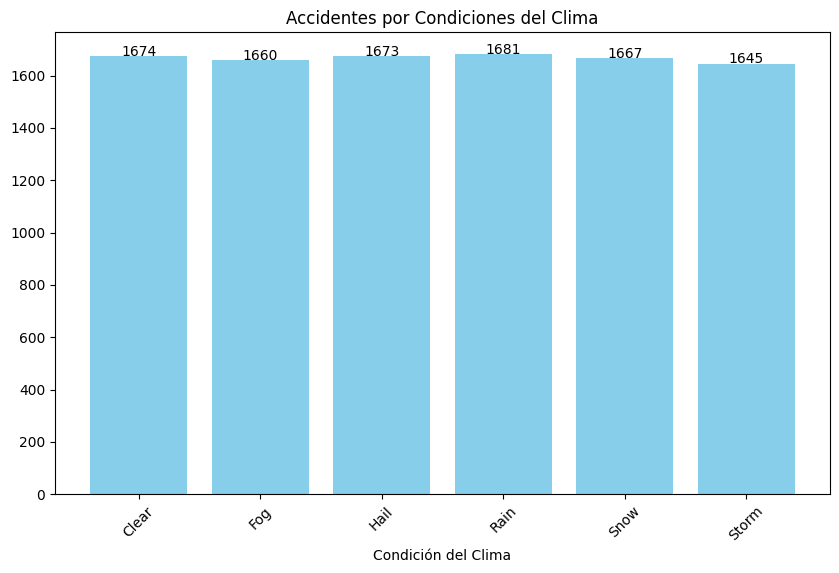

In [ ]:
df_agrupado_condicion = df_accidentes.groupby('Weather Condition').size().reset_index(name='Cantidad')
#print(df_agrupado_condicion)
plt.figure(figsize=(10, 6))
plt.bar(df_agrupado_condicion['Weather Condition'], df_agrupado_condicion['Cantidad'], color='skyblue')
for i, valor in enumerate(df_agrupado_condicion['Cantidad']):
    plt.text(i, valor + 1, str(valor), ha='center', fontsize=10)
plt.xlabel('Condición del Clima')
plt.title('Accidentes por Condiciones del Clima')
plt.xticks(rotation=45)
plt.show()

# Condiciones climáticas
Como en el punto anterior, hay una distribucion muy igualada entre las condiciones climáticas presentes en los diferentes accidentes, por lo que podríamos concluir que todas influyen de manera similar en la cantidad de accidentes.

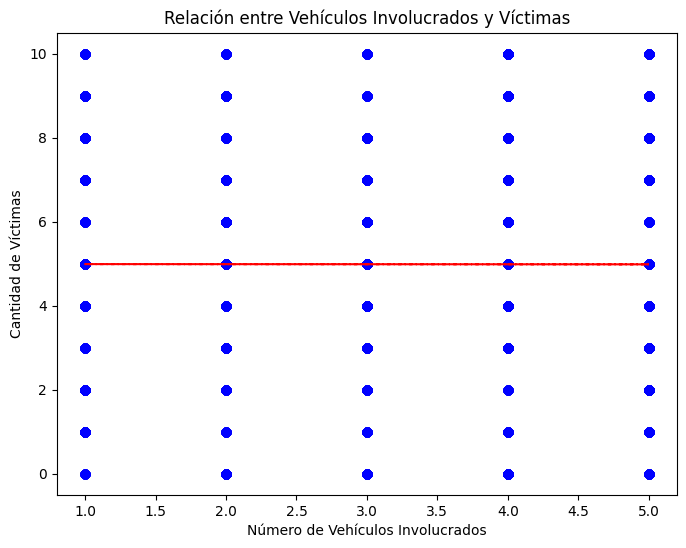

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_accidentes['Vehicles Involved'], df_accidentes['Casualties'], color='blue', alpha=0.5)
plt.xlabel('Número de Vehículos Involucrados')
plt.ylabel('Cantidad de Víctimas')
plt.title('Relación entre Vehículos Involucrados y Víctimas')
m, b = np.polyfit(df_accidentes['Vehicles Involved'], df_accidentes['Casualties'], 1)
plt.plot(df_accidentes['Vehicles Involved'], m * df_accidentes['Vehicles Involved'] + b, color='red', linestyle='--')
plt.show()


# Correlación entre cantidad de vehículos del siniestro y la cantidad de víctimas
La casi ausencia de pendiente en la línea roja sugiere que el número de vehículos involucrados en un accidente no es un factor determinante para predecir la cantidad de víctimas. En otras palabras, un accidente con un solo vehículo puede causar tantas víctimas como uno con varios vehículos.

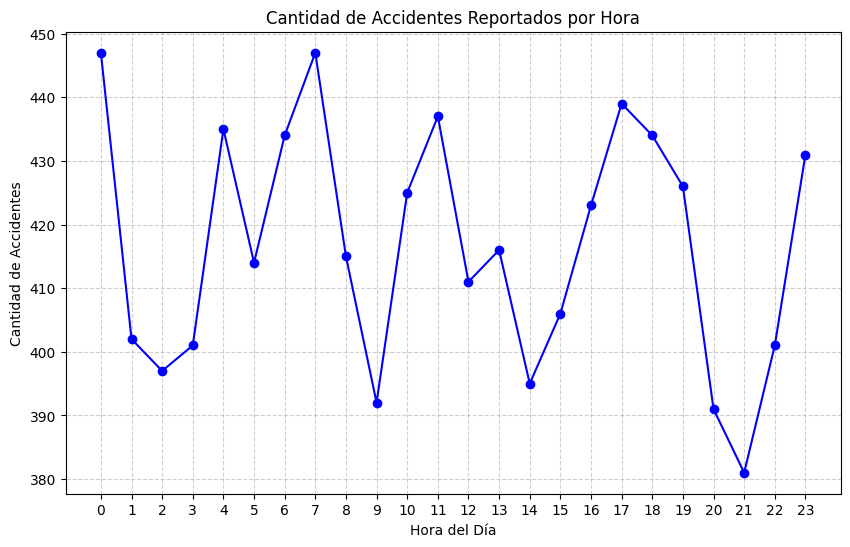

In [ ]:
df_accidentes['Hour'] = pd.to_datetime(df_accidentes['Time'], format='%H:%M').dt.hour
df_agrupado_hora = df_accidentes.groupby('Hour').size().reset_index(name='Cantidad')

plt.figure(figsize=(10, 6))
plt.plot(df_agrupado_hora['Hour'], df_agrupado_hora['Cantidad'], marker='o', linestyle='-', color='b')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes Reportados por Hora')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Horarios de mayor siniestralidad
El gráfico muestra la cantidad de accidentes reportados en cada hora del día. A partir de la imagen, podemos inferir lo siguiente:
Picos de accidentes en horas específicas, relacionadas a las hora pico, aunque hay un par de horarios no relacionados, entre las 23:00 y las 00:00, quizá se presenta alta accidentalidad por la irresponsabilidad al conducir en vías mas despejadas, o conductores cansados o bajo los efectos del alcohol.


# Entrega Final proyecto - Enfoque 1 Regresión

## Feature Selection para reducción de dimensionalidad
El dataset contiene un número importante de variables categóricas que, si bien aportan información relevante, pueden generar una alta dimensionalidad una vez codificadas. Debido a que solo se cuenta con una variable numérica significativa (Vehicles Involved), aplicar directamente un método de selección de características como SelectKBest limitaría las posibilidades de análisis.

Por esta razón, se opta por PCA (Análisis de Componentes Principales) como técnica de reducción de dimensionalidad. Esta técnica permite identificar combinaciones lineales de las variables originales que retienen la mayor varianza posible del conjunto dedatos.

Aunque los componentes generados por PCA no son directamente interpretables como las variables originales, su uso es apropiado cuando se busca mejorar el desempeño de modelos predictivos y reducir el riesgo de sobreajuste, especialmente cuando se trabaja con un gran número de variables transformadas desde categorías.

Nota: Correr directamente PCA hacía que el notebook se bloqueara, por la cantidad de categorías únicas que tenían algunas variables, asi que se eliminaron manualmente algunas columnas del dataset antes de la reducción de dimensionalidad porque no tenían ningún valor predictivo dentro del ejercicio.

In [2]:
# Cargar paquetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Elliminación de  columnas con poco valor predictivo
columnas_a_eliminar = ['Accident ID', 'Date', 'Time', 'Country', 'City', 'Latitude', 'Longitude']
df_accidentes_limpio = df_accidentes.drop(columns=columnas_a_eliminar)

# Eliminación de valores nulos
df_accidentes_limpio = df_accidentes_limpio.dropna()

# Separación de variable a evaluar
y = df_accidentes_limpio['Casualties']
X = df_accidentes_limpio.drop('Casualties', axis=1)

# Codificamos variables categóricas (OneHotEncoder para PCA)
X_encoded = pd.get_dummies(X, drop_first=True)

# Escalamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# PCA conservando componentes que expliquen el 95% de la varianza
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Se conservaron {pca.n_components_} componentes principales que explican el 95% de la varianza.")

# División de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

Se conservaron 13 componentes principales que explican el 95% de la varianza.


Se aplicó el método de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad del conjunto de datos, después de codificar las variables categóricas y escalar los datos. El modelo conservó 13 componentes principales, los cuales explican el 95% de la varianza total del conjunto original. Esto indica que es posible representar casi toda la información relevante de los datos con una menor cantidad de variables, lo que facilita el procesamiento, mejora el rendimiento de los modelos y reduce el riesgo de sobreajuste.

In [3]:
# Visualización de loz componentes principales
componentes_df = pd.DataFrame(
    pca.components_,
    columns=X_encoded.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

componentes_df.head(16)


,Vehicles Involved,Weather Condition_Fog,Weather Condition_Hail,Weather Condition_Rain,Weather Condition_Snow,Weather Condition_Storm,Road Condition_Gravel,Road Condition_Icy,Road Condition_Snowy,Road Condition_Under Construction,Road Condition_Wet,Cause_Drunk Driving,Cause_Mechanical Failure,Cause_Reckless Driving,Cause_Speeding,Cause_Weather Conditions
PC1,0.054040,-0.220901,0.240045,-0.222432,0.142034,0.075123,0.404760,-0.182224,0.033999,0.167700,-0.424682,-0.277067,-0.236257,0.524557,0.004998,-0.030484
PC2,0.022330,-0.413192,0.145316,0.436323,-0.097443,-0.084925,-0.032866,-0.265502,0.066256,0.189399,0.045731,-0.434197,0.156335,-0.270250,0.432704,0.115810
PC3,-0.003809,0.067960,0.547353,-0.154053,-0.316702,-0.158993,0.257074,-0.260623,-0.290366,-0.070824,0.355420,0.128573,-0.181562,-0.131236,-0.144227,0.330570
PC4,0.000778,-0.210621,-0.046311,-0.025537,0.292732,-0.004315,0.051965,-0.143535,0.465871,-0.448375,0.071936,-0.152610,0.184170,-0.044445,-0.423275,0.426887
PC5,-0.044514,-0.276274,-0.180954,0.300092,-0.159812,0.331659,0.438568,0.000471,0.047994,-0.364501,-0.121539,0.399203,-0.321495,-0.168923,0.155645,-0.074786
PC6,-0.006832,-0.162177,0.021189,-0.362723,-0.091975,0.597553,-0.175305,-0.450782,0.176583,0.180435,0.257636,0.132535,0.174810,-0.039309,-0.010385,-0.249555
PC7,0.029260,0.242963,-0.039909,-0.010668,-0.439341,0.263890,-0.306527,0.084868,0.335369,0.148764,-0.255468,-0.112588,-0.374121,-0.016888,0.032740,0.469809
PC8,0.004705,-0.042839,-0.060052,-0.209210,0.538643,-0.222428,-0.189150,-0.174883,0.134112,0.080263,0.167755,0.206170,-0.538617,-0.137837,0.358653,0.109453
PC9,0.028709,-0.459180,0.329526,-0.270518,0.153303,0.244060,-0.184554,0.556806,-0.226706,0.013906,-0.164988,0.051378,0.056694,-0.263935,0.002127,0.158343
PC10,-0.014987,-0.088551,0.414972,0.134826,-0.095044,-0.339705,-0.148697,-0.076731,0.438295,0.145103,-0.346104,0.443436,0.078077,-0.105402,-0.177428,-0.266187


#Selección del modelo
Para predecir la cantidad de víctimas (Casualties) en accidentes de tránsito, se optó por utilizar un modelo de regresión lineal, dado que se trata de una variable numérica continua. Esta elección resulta adecuada ya que, tras aplicar PCA para reducir la dimensionalidad y eliminar posibles colinealidades entre variables, el conjunto de datos quedó compuesto por componentes principales no correlacionados, lo cual se ajusta muy bien a los supuestos de la regresión lineal. Además, este modelo es eficiente computacionalmente, fácil de interpretar y sirve como una excelente línea base para comparar con modelos más complejos en futuras etapas.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")


Error cuadrático medio (MSE): 9.86
Coeficiente de determinación (R^2): -0.00


#MSE
- Un MSE de 9.86 indica que, en promedio, las predicciones del modelo están desviadas del valor real por una raíz de aproximadamente √9.86 ≈ 3.14 unidades en la variable Casualties.
- Si la media de víctimas por accidente es baja (por ejemplo, entre 1 y 5), ese error puede ser relativamente alto.

#R2
- Un valor de 0.00 (o incluso ligeramente negativo) significa que el modelo no está explicando nada de la variabilidad en Casualties.
- De hecho, un R² negativo indica que el modelo está prediciendo peor que simplemente usar la media de Casualties como predicción para todos los casos.


El enfoque de elección de un modelo de regresión falló, creo principalmente por los tipos de variables independientes que tiene el dataset para predecir la variable dependiente de víctimas. Asi que voy a probar un enfoque de clasificación que puede adecuarse mejor al tipo de variables que tengo en el dataset.


# Entrega Final proyecto - Enfoque 2 Clasificación

En este caso lo que haremos será usar la reducción de dimensionalidad con PCA, sin embargo, para la variable Casualties creamos categorías de acuerdo al numero de muertes en el accidente, para posteriormente usar un modelo de categorización que asigne de acuerdo a las demás variables si la mortalidad del accidente es nula, baja, media o alta.


In [5]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Eliminar columnas irrelevantes
columnas_a_eliminar = ['Accident ID', 'Date', 'Time', 'Country', 'City', 'Latitude', 'Longitude']
X = df_accidentes.drop(columns=columnas_a_eliminar)
y = df_accidentes['Cause']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Codificación one-hot para variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Selección de características con SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)
X_selected_clf = selector.fit_transform(X_scaled, y_encoded)


columnas_seleccionadas = X_encoded.columns[selector.get_support()]
print("Columnas seleccionadas para clasificación:")
print(list(columnas_seleccionadas))


Columnas seleccionadas para clasificación:
['Vehicles Involved', 'Casualties', 'Weather Condition_Fog', 'Weather Condition_Hail', 'Weather Condition_Rain', 'Weather Condition_Snow', 'Weather Condition_Storm', 'Road Condition_Gravel', 'Road Condition_Icy', 'Road Condition_Snowy', 'Road Condition_Under Construction', 'Road Condition_Wet', 'Cause_Drunk Driving', 'Cause_Mechanical Failure', 'Cause_Reckless Driving', 'Cause_Speeding', 'Cause_Weather Conditions']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=17. All the features will be returned.
  warnings.warn(


In [6]:
print(columnas_seleccionadas)


Index(['Vehicles Involved', 'Casualties', 'Weather Condition_Fog',
       'Weather Condition_Hail', 'Weather Condition_Rain',
       'Weather Condition_Snow', 'Weather Condition_Storm',
       'Road Condition_Gravel', 'Road Condition_Icy', 'Road Condition_Snowy',
       'Road Condition_Under Construction', 'Road Condition_Wet',
       'Cause_Drunk Driving', 'Cause_Mechanical Failure',
       'Cause_Reckless Driving', 'Cause_Speeding', 'Cause_Weather Conditions'],
      dtype='object')


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected_clf, y_encoded, test_size=0.3, random_state=42)

# Entrenamiento del modelo
modelo_clf = RandomForestClassifier(random_state=42)
modelo_clf.fit(X_train, y_train)

# Predicciones
y_pred = modelo_clf.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}\n")

# Reporte detallado
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Accuracy del modelo: 1.00

Reporte de clasificación:
                    precision    recall  f1-score   support

Distracted Driving       1.00      1.00      1.00       485
     Drunk Driving       1.00      1.00      1.00       518
Mechanical Failure       1.00      1.00      1.00       512
  Reckless Driving       1.00      1.00      1.00       465
          Speeding       1.00      1.00      1.00       512
Weather Conditions       1.00      1.00      1.00       508

          accuracy                           1.00      3000
         macro avg       1.00      1.00      1.00      3000
      weighted avg       1.00      1.00      1.00      3000

Matriz de confusión:
[[485   0   0   0   0   0]
 [  0 518   0   0   0   0]
 [  0   0 512   0   0   0]
 [  0   0   0 465   0   0]
 [  0   0   0   0 512   0]
 [  0   0   0   0   0 508]]


# Resultado Perfecto (Accuracy = 1.00)
El modelo alcanzó un 100% de precisión, con todas las clases predichas correctamente. Cada categoría como “Drunk Driving” o “Speeding” fue clasificada sin errores.  
Causa probable: Este resultado fue producto de datos filtrados incorrectamente: se incluyeron variables que codificaban directamente la etiqueta objetivo (por ejemplo, columnas como Cause_Speeding, Cause_Drunk Driving, etc.). Es decir, el modelo tenía acceso a la respuesta correcta dentro de las variables predictoras.  
Resultado: Es un error metodológico que no se contemplaba, por lo que el siguiente paso es reevaluar el modelo sin tener en cuenta la variable de causas.

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Copia del dataframe original
df_clf = df_accidentes.copy()

# Eliminamos columnas irrelevantes si existen
columnas_a_eliminar = [
    'Accident ID', 'Date', 'Time', 'Country', 'City',
    'Latitude', 'Longitude', 'Cause', 'Casualties', 'Casualties_cat'
]
columnas_a_eliminar = [col for col in columnas_a_eliminar if col in df_clf.columns]
X_clf = df_clf.drop(columns=columnas_a_eliminar)

# Codificación de variables categóricas
X_encoded = pd.get_dummies(X_clf, drop_first=True)

# Eliminamos cualquier columna codificada que contenga 'Longitude', 'Latitude' o 'Cause'
X_encoded = X_encoded.loc[:, ~X_encoded.columns.str.contains('Longitude|Latitude|Cause')]

# Escalado para chi2 (requiere valores positivos)
X_scaled_chi2 = MinMaxScaler().fit_transform(X_encoded)

# Variable objetivo (Cause)
le = LabelEncoder()
y_encoded = le.fit_transform(df_clf['Cause'])

# Selección de características
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X_scaled_chi2, y_encoded)
columnas_seleccionadas = X_encoded.columns[selector.get_support()]

print("✅ Variables seleccionadas para clasificación:")
print(columnas_seleccionadas)


✅ Variables seleccionadas para clasificación:
Index(['Weather Condition_Fog', 'Weather Condition_Hail',
       'Weather Condition_Rain', 'Weather Condition_Snow',
       'Weather Condition_Storm', 'Road Condition_Gravel',
       'Road Condition_Icy', 'Road Condition_Snowy',
       'Road Condition_Under Construction', 'Road Condition_Wet'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42)

# Entrenamiento del modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicción
y_pred = clf.predict(X_test)

# Evaluación
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy del modelo: 0.17733333333333334

Reporte de clasificación:
                     precision    recall  f1-score   support

Distracted Driving       0.19      0.13      0.15       485
     Drunk Driving       0.17      0.25      0.20       518
Mechanical Failure       0.18      0.19      0.19       512
  Reckless Driving       0.16      0.20      0.17       465
          Speeding       0.19      0.21      0.20       512
Weather Conditions       0.18      0.09      0.12       508

          accuracy                           0.18      3000
         macro avg       0.18      0.18      0.17      3000
      weighted avg       0.18      0.18      0.17      3000


Matriz de confusión:
 [[ 62 125  70 101  77  50]
 [ 50 127 104  96 105  36]
 [ 54 124  98  95  92  49]
 [ 54 112  73  91  93  42]
 [ 50 117 105  95 108  37]
 [ 54 137  81 104  86  46]]


# Resultado Realista (Accuracy = 0.177)  

Con una clasificación más estricta y realista (evitando filtración de variables ligadas a la columna objetivo), el modelo bajó a un accuracy de 17.7%, y un f1-score similar para todas las clases.

Interpretación:  

- El modelo apenas puede realizar clasificaciones correctamente  
- La matriz de confusión muestra que las predicciones están muy dispersas.  
- Ninguna clase logra destacarse como bien predicha, lo que indica baja capacidad discriminativa de las variables disponibles.  

Resultado:  
- Las variables seleccionadas no contienen suficiente información predictiva para inferir correctamente la causa del accidente. El modelo no puede “ver” patrones claros que permitan diferenciar entre causas como Distracted Driving o Mechanical Failure.
- El dataset contiene variables demasiado genéricas o indirectas (como condiciones climáticas o estado de la vía), que no tienen correlación fuerte con las causas específicas del accidente.



# Conclusiones Generales

- El dataset contiene variables demasiado genéricas o indirectas (como condiciones climáticas o estado de la vía), que no tienen correlación fuerte con las causas específicas del accidente.

- La baja precisión en la clasificación indica que los modelos no puede aprender relaciones útiles entre las variables y la variable objetivo (la causa del accidente y la cantidad de victimas).

- Incluso con técnicas avanzadas de reducción de dimensionalidad y selección de características, el rendimiento sigue siendo bajo, lo cual apunta a una limitación estructural del dataset, esto se evidencia también en la primera entrega, donde, todas las distribiciones de las variables son practicamente similares, y donde no hay una fuerte correlación entre alguna de las variables.